In [2]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn import manifold
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import matplotlib.pyplot as plt
import pickle

class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

# hidden trace

(23, 100)
(22, 100)
(22, 100)
(67, 100)


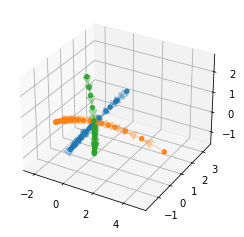

In [90]:
# P矩阵旋转，分块B
# "--gpu", "0", "--lr", "0.01", "--approach", "edfsnn", "--nhid", "100", "--nepochs", "50", "--experiment", "mnist_classIL", "--nlayers", "1", "--sbatch", "256", "--lr_factor", "1", "--output", "xxxx", "--seed", "0"

# 正确率 100， 100， 100
# https://is7lwmjos4.feishu.cn/sheets/shtcnGdyAwjEfOPKZbeZr7Iivsh?from=from_copylink

with open("E:/Study/Data/essaycode/EAST/output_data/trace_hidden_train.pkl", 'rb') as f:
    x = pickle.load(f)
y = []
yy = []
for i in range(len(x)):
    yy = []
    yy.append(x[i][0].cpu().detach().numpy())
    yy.append(x[i][1].cpu().detach().numpy())
    y.append(yy)
task1 = []
task2 = []
task3 = []
for i in range(len(y)):
    if y[i][0] == 0:
        task1.append(y[i][1])
    if y[i][0] == 1:
        task2.append(y[i][1])
    if y[i][0] == 2:
        task3.append(y[i][1])
task1 = np.array(task1)
task2 = np.array(task2)
task3 = np.array(task3)
y = []
for i in range(0,task1.shape[0],20):
    y.append(task1[i:i+20,:,:].mean(0))
task1 = np.array(y)[:len(y)//2]
task1 = task1.mean(1)
print(task1.shape)
y = []
for i in range(0,task2.shape[0],20):
    y.append(task2[i:i+20,:,:].mean(0))
task2 = np.array(y)[:len(y)//2]
task2 = task2.mean(1)
print(task2.shape)
y = []
for i in range(0,task3.shape[0],20):
    y.append(task3[i:i+20,:,:].mean(0))
task3 = np.array(y)[:len(y)//2]
task3 = task3.mean(1)
print(task3.shape)

x = np.r_[task1,task2,task3]
print(x.shape)
x_ = manifold.Isomap(n_components=3).fit_transform(x)
x2 = x_[0:task1.shape[0]]
x3 = x_[task1.shape[0]:task1.shape[0]+task2.shape[0]]
x4 = x_[task1.shape[0]+task2.shape[0]:task1.shape[0]+task2.shape[0]+task3.shape[0]]

colors=['C{}'.format(x) for x in range(10)]

j=0
ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x2[:,0]
Y1 = x2[:,1]
Z1 = x2[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()

j=1
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x3[:,0]
Y1 = x3[:,1]
Z1 = x3[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
j=2
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x4[:,0]
Y1 = x4[:,1] 
Z1 = x4[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
# ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.savefig('E:\WPS同步文件夹\EAST\最新整理版本-20220507\Fig/wP_regionB.svg')
plt.show()

In [ ]:
# test

200
(256, 100)
(256, 100)
(256, 100)
(768, 100)


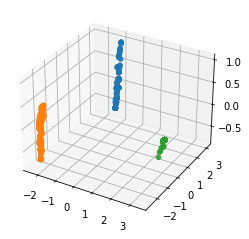

In [3]:
# P矩阵旋转，分块B
# "--gpu", "0", "--lr", "0.01", "--approach", "edfsnn", "--nhid", "100", "--nepochs", "50", "--experiment", "mnist_classIL", "--nlayers", "1", "--sbatch", "256", "--lr_factor", "1", "--output", "xxxx", "--seed", "0"

# 正确率 100， 100， 100
# https://is7lwmjos4.feishu.cn/sheets/shtcnGdyAwjEfOPKZbeZr7Iivsh?from=from_copylink

with open("E:/Study/Data/essaycode/EAST/output_data/trace_test_B_region.pkl", 'rb') as f:
    x = pickle.load(f)
print(len(x))
y = []
yy = []
for i in range(len(x)):
    yy = []
    yy.append(x[i][0].cpu().detach().numpy())
    yy.append(x[i][1].cpu().detach().numpy())
    y.append(yy)
task1 = []
task2 = []
task3 = []
for i in range(len(y)):
    if y[i][0] == 0:
        task1.append(y[i][1])
    if y[i][0] == 1:
        task2.append(y[i][1])
    if y[i][0] == 2:
        task3.append(y[i][1])
task1 = np.array(task1)
task2 = np.array(task2)
task3 = np.array(task3)
y = []
for i in range(0,task1.shape[0],20):
    y.append(task1[i:i+20,:,:].mean(0))
task1 = np.array(y)[0]
print(task1.shape)
y = []
for i in range(0,task2.shape[0],20):
    y.append(task2[i:i+20,:,:].mean(0))
task2 = np.array(y)[0]
print(task2.shape)
y = []
for i in range(0,task3.shape[0],20):
    y.append(task3[i:i+20,:,:].mean(0))
task3 = np.array(y)[0]
print(task3.shape)

x = np.r_[task1,task2,task3]
print(x.shape)
x_ = PCA(n_components=3).fit_transform(x)
# np.random.seed(0)
# x_ = TSNE(n_components=3).fit_transform(x)
x2 = x_[0:task1.shape[0]]
x3 = x_[task1.shape[0]:task1.shape[0]+task2.shape[0]]
x4 = x_[task1.shape[0]+task2.shape[0]:task1.shape[0]+task2.shape[0]+task3.shape[0]]

colors=['C{}'.format(x) for x in range(10)]

j=0
ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x2[:,0]
Y1 = x2[:,1]
Z1 = x2[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
# for i in range(0,X1.shape[0]-1):
#     a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
#     ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()

j=1
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x3[:,0]
Y1 = x3[:,1]
Z1 = x3[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
# for i in range(0,X1.shape[0]-1):
#     a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
#     ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
j=2
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x4[:,0]
Y1 = x4[:,1] 
Z1 = x4[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
# for i in range(0,X1.shape[0]-1):
#     a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
#     ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
# ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.savefig('C:\code\EDF图\incremental/iso123_20220507.svg')
plt.savefig('E:\WPS同步文件夹\EAST\最新整理版本-20220507\Fig/wP_regionB_hidden_test.svg')
plt.show()

In [ ]:
# test output

torch.Size([256, 10])
(256, 10)
(256, 10)
(256, 10)
(768, 10)


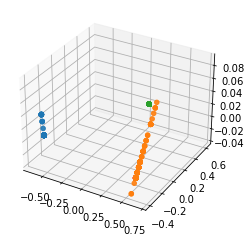

In [4]:
# P矩阵旋转，分块B
# "--gpu", "0", "--lr", "0.01", "--approach", "edfsnn", "--nhid", "100", "--nepochs", "50", "--experiment", "mnist_classIL", "--nlayers", "1", "--sbatch", "256", "--lr_factor", "1", "--output", "xxxx", "--seed", "0"

# 正确率 100， 100， 100
# https://is7lwmjos4.feishu.cn/sheets/shtcnGdyAwjEfOPKZbeZr7Iivsh?from=from_copylink

with open("E:/Study/Data/essaycode/EAST/output_data/test_output_trace_B_region_LB.pkl", 'rb') as f:
    x = pickle.load(f)
print(x[0][1].shape)
y = []
yy = []
for i in range(len(x)):
    yy = []
    yy.append(x[i][0].cpu().detach().numpy())
    yy.append(x[i][1].cpu().detach().numpy())
    y.append(yy)
task1 = []
task2 = []
task3 = []
for i in range(len(y)):
    if y[i][0] == 0:
        task1.append(y[i][1])
    if y[i][0] == 1:
        task2.append(y[i][1])
    if y[i][0] == 2:
        task3.append(y[i][1])
task1 = np.array(task1)
task2 = np.array(task2)
task3 = np.array(task3)
y = []
for i in range(0,task1.shape[0],20):
    y.append(task1[i:i+20,:,:].mean(0))
task1 = np.array(y)[0]
print(task1.shape)
y = []
for i in range(0,task2.shape[0],20):
    y.append(task2[i:i+20,:,:].mean(0))
task2 = np.array(y)[0]
print(task2.shape)
y = []
for i in range(0,task3.shape[0],20):
    y.append(task3[i:i+20,:,:].mean(0))
task3 = np.array(y)[0]
print(task3.shape)

x = np.r_[task1,task2,task3]
print(x.shape)
x_ = PCA(n_components=3).fit_transform(x)
# np.random.seed(0)
# x_ = TSNE(n_components=3).fit_transform(x)
x2 = x_[0:task1.shape[0]]
x3 = x_[task1.shape[0]:task1.shape[0]+task2.shape[0]]
x4 = x_[task1.shape[0]+task2.shape[0]:task1.shape[0]+task2.shape[0]+task3.shape[0]]

colors=['C{}'.format(x) for x in range(10)]

j=0
ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x2[:,0]
Y1 = x2[:,1]
Z1 = x2[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
# for i in range(0,X1.shape[0]-1):
#     a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
#     ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()

j=1
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x3[:,0]
Y1 = x3[:,1]
Z1 = x3[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
# for i in range(0,X1.shape[0]-1):
#     a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
#     ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
j=2
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x4[:,0]
Y1 = x4[:,1] 
Z1 = x4[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
# for i in range(0,X1.shape[0]-1):
#     a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
#     ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
# ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.savefig('C:\code\EDF图\incremental/iso123_20220507.svg')
plt.savefig('E:\WPS同步文件夹\EAST\最新整理版本-20220507\Fig/wP_regionB_output_test.svg')
plt.show()

(23, 100)
(22, 100)
(22, 100)
(67, 100)


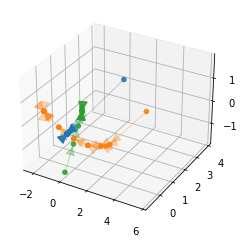

In [16]:
# P矩阵旋转，uniform B
# "--gpu", "0", "--lr", "0.01", "--approach", "edfsnn", "--nhid", "100", "--nepochs", "50", "--experiment", "mnist_classIL", "--nlayers", "1", "--sbatch", "256", "--lr_factor", "1", "--output", "xxxx", "--seed", "0", "--B_type", "Uniform", "--trace_name", "trace_train_B_Uniform", "--phase", "train"

# 正确率 100, 0, 100
# https://is7lwmjos4.feishu.cn/sheets/shtcnGdyAwjEfOPKZbeZr7Iivsh?from=from_copylink

with open("E:/Study/Data/essaycode/EAST/output_data/trace_train_B_Uniform.pkl", 'rb') as f:
    x = pickle.load(f)
y = []
yy = []
for i in range(len(x)):
    yy = []
    yy.append(x[i][0].cpu().detach().numpy())
    yy.append(x[i][1].cpu().detach().numpy())
    y.append(yy)
task1 = []
task2 = []
task3 = []
for i in range(len(y)):
    if y[i][0] == 0:
        task1.append(y[i][1])
    if y[i][0] == 1:
        task2.append(y[i][1])
    if y[i][0] == 2:
        task3.append(y[i][1])
task1 = np.array(task1)
task2 = np.array(task2)
task3 = np.array(task3)
y = []
for i in range(0,task1.shape[0],20):
    y.append(task1[i:i+20,:,:].mean(0))
task1 = np.array(y)[:len(y)//2]
task1 = task1.mean(1)
print(task1.shape)
y = []
for i in range(0,task2.shape[0],20):
    y.append(task2[i:i+20,:,:].mean(0))
task2 = np.array(y)[:len(y)//2]
task2 = task2.mean(1)
print(task2.shape)
y = []
for i in range(0,task3.shape[0],20):
    y.append(task3[i:i+20,:,:].mean(0))
task3 = np.array(y)[:len(y)//2]
task3 = task3.mean(1)
print(task3.shape)

x = np.r_[task1,task2,task3]
print(x.shape)
x_ = manifold.Isomap(n_components=3).fit_transform(x)
x2 = x_[0:task1.shape[0]]
x3 = x_[task1.shape[0]:task1.shape[0]+task2.shape[0]]
x4 = x_[task1.shape[0]+task2.shape[0]:task1.shape[0]+task2.shape[0]+task3.shape[0]]

colors=['C{}'.format(x) for x in range(10)]

j=0
ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x2[:,0]
Y1 = x2[:,1]
Z1 = x2[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()

j=1
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x3[:,0]
Y1 = x3[:,1]
Z1 = x3[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
j=2
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x4[:,0]
Y1 = x4[:,1] 
Z1 = x4[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
# ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.savefig('C:\code\EDF图\incremental/iso123_20220507.svg')
plt.show()

In [ ]:
# test

200
(256, 100)
(256, 100)
(256, 100)
(768, 100)


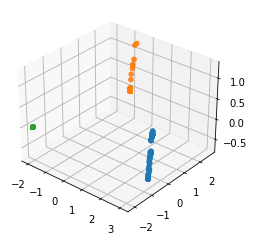

In [12]:
# P矩阵旋转，uniform B
# "--gpu", "0", "--lr", "0.01", "--approach", "edfsnn", "--nhid", "100", "--nepochs", "50", "--experiment", "mnist_classIL", "--nlayers", "1", "--sbatch", "256", "--lr_factor", "1", "--output", "xxxx", "--seed", "0", "--B_type", "Uniform", "--trace_name", "trace_test_B_uniform.pkl", "--phase", "test"

# 正确率 100, 0, 100
# https://is7lwmjos4.feishu.cn/sheets/shtcnGdyAwjEfOPKZbeZr7Iivsh?from=from_copylink

with open("E:/Study/Data/essaycode/EAST/output_data/trace_test_B_uniform.pkl", 'rb') as f:
    x = pickle.load(f)
print(len(x))
y = []
yy = []
for i in range(len(x)):
    yy = []
    yy.append(x[i][0].cpu().detach().numpy())
    yy.append(x[i][1].cpu().detach().numpy())
    y.append(yy)
task1 = []
task2 = []
task3 = []
for i in range(len(y)):
    if y[i][0] == 0:
        task1.append(y[i][1])
    if y[i][0] == 1:
        task2.append(y[i][1])
    if y[i][0] == 2:
        task3.append(y[i][1])
task1 = np.array(task1)
task2 = np.array(task2)
task3 = np.array(task3)
y = []
for i in range(0,task1.shape[0],20):
    y.append(task1[i:i+20,:,:].mean(0))
task1 = np.array(y)[0]
print(task1.shape)
y = []
for i in range(0,task2.shape[0],20):
    y.append(task2[i:i+20,:,:].mean(0))
task2 = np.array(y)[0]
print(task2.shape)
y = []
for i in range(0,task3.shape[0],20):
    y.append(task3[i:i+20,:,:].mean(0))
task3 = np.array(y)[0]
print(task3.shape)

x = np.r_[task1,task2,task3]
print(x.shape)
x_ = PCA(n_components=3).fit_transform(x)
# np.random.seed(0)
# x_ = TSNE(n_components=3).fit_transform(x)
x2 = x_[0:task1.shape[0]]
x3 = x_[task1.shape[0]:task1.shape[0]+task2.shape[0]]
x4 = x_[task1.shape[0]+task2.shape[0]:task1.shape[0]+task2.shape[0]+task3.shape[0]]

colors=['C{}'.format(x) for x in range(10)]

j=0
ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x2[:,0]
Y1 = x2[:,1]
Z1 = x2[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
# for i in range(0,X1.shape[0]-1):
#     a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
#     ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()

j=1
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x3[:,0]
Y1 = x3[:,1]
Z1 = x3[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
# for i in range(0,X1.shape[0]-1):
#     a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
#     ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
j=2
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x4[:,0]
Y1 = x4[:,1] 
Z1 = x4[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
# for i in range(0,X1.shape[0]-1):
#     a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
#     ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
# ax.add_artist(a1)
ax.view_init(elev=30, azim=-50)
# plt.savefig('C:\code\EDF图\incremental/iso123_20220507.svg')
plt.show()

2680
(23, 100)
(22, 100)
(22, 100)
(67, 100)


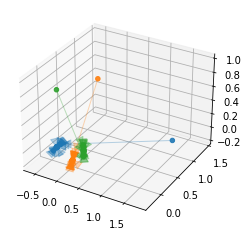

In [7]:
# 无p矩阵，region B
# "--gpu", "0", "--lr", "0.01", "--approach", "edfsnn", "--nhid", "100", "--nepochs", "50", "--experiment", "mnist_classIL", "--nlayers", "1", "--sbatch", "256", "--lr_factor", "1", "--output", "xxxx", "--seed", "0", "--B_type", "Uniform", "--trace_name", "trace_train_B_Uniform", "--phase", "train"

# 正确率 8.3, 86.5, 100
# https://is7lwmjos4.feishu.cn/sheets/shtcnGdyAwjEfOPKZbeZr7Iivsh?from=from_copylink

with open("E:/Study/Data/essaycode/EAST/output_data/trace_train_B_region_withoutP.pkl", 'rb') as f:
    x = pickle.load(f)
print(len(x))
y = []
yy = []
for i in range(len(x)):
    yy = []
    yy.append(x[i][0].cpu().detach().numpy())
    yy.append(x[i][1].cpu().detach().numpy())
    y.append(yy)
task1 = []
task2 = []
task3 = []
for i in range(len(y)):
    if y[i][0] == 0:
        task1.append(y[i][1])
    if y[i][0] == 1:
        task2.append(y[i][1])
    if y[i][0] == 2:
        task3.append(y[i][1])
task1 = np.array(task1)
task2 = np.array(task2)
task3 = np.array(task3)
y = []
for i in range(0,task1.shape[0],20):
    y.append(task1[i:i+20,:,:].mean(0))
task1 = np.array(y)[:len(y)//2]
task1 = task1.mean(1)
print(task1.shape)
y = []
for i in range(0,task2.shape[0],20):
    y.append(task2[i:i+20,:,:].mean(0))
task2 = np.array(y)[:len(y)//2]
task2 = task2.mean(1)
print(task2.shape)
y = []
for i in range(0,task3.shape[0],20):
    y.append(task3[i:i+20,:,:].mean(0))
task3 = np.array(y)[:len(y)//2]
task3 = task3.mean(1)
print(task3.shape)

x = np.r_[task1,task2,task3]
print(x.shape)
x_ = manifold.Isomap(n_components=3).fit_transform(x)
x2 = x_[0:task1.shape[0]]
x3 = x_[task1.shape[0]:task1.shape[0]+task2.shape[0]]
x4 = x_[task1.shape[0]+task2.shape[0]:task1.shape[0]+task2.shape[0]+task3.shape[0]]

colors=['C{}'.format(x) for x in range(10)]

j=0
ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x2[:,0]
Y1 = x2[:,1]
Z1 = x2[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()

j=1
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x3[:,0]
Y1 = x3[:,1]
Z1 = x3[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
j=2
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x4[:,0]
Y1 = x4[:,1] 
Z1 = x4[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
# ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.savefig('C:\code\EDF图\incremental/iso123_20220507.svg')
plt.savefig('E:\WPS同步文件夹\EAST\最新整理版本-20220507\Fig/woP_regionB_hidden_train.svg')
plt.show()

In [11]:
#test

200
(256, 100)
(256, 100)
(256, 100)
(768, 100)


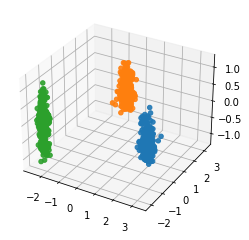

In [5]:
# 无p矩阵，region B
# "--gpu", "0", "--lr", "0.01", "--approach", "edfsnn", "--nhid", "100", "--nepochs", "50", "--experiment", "mnist_classIL", "--nlayers", "1", "--sbatch", "256", "--lr_factor", "1", "--output", "xxxx", "--seed", "0", "--B_type", "Regions_Standard", "--trace_name", "trace_test_B_region_withoutP", "--phase", "test", "--without_P"

# 正确率 8.3, 86.5, 100
# https://is7lwmjos4.feishu.cn/sheets/shtcnGdyAwjEfOPKZbeZr7Iivsh?from=from_copylink

with open("E:/Study/Data/essaycode/EAST/output_data/trace_test_B_region_withoutP.pkl", 'rb') as f:
    x = pickle.load(f)
print(len(x))
y = []
yy = []
for i in range(len(x)):
    yy = []
    yy.append(x[i][0].cpu().detach().numpy())
    yy.append(x[i][1].cpu().detach().numpy())
    y.append(yy)
task1 = []
task2 = []
task3 = []
for i in range(len(y)):
    if y[i][0] == 0:
        task1.append(y[i][1])
    if y[i][0] == 1:
        task2.append(y[i][1])
    if y[i][0] == 2:
        task3.append(y[i][1])
task1 = np.array(task1)
task2 = np.array(task2)
task3 = np.array(task3)
y = []
for i in range(0,task1.shape[0],20):
    y.append(task1[i:i+20,:,:].mean(0))
task1 = np.array(y)[0]
print(task1.shape)
y = []
for i in range(0,task2.shape[0],20):
    y.append(task2[i:i+20,:,:].mean(0))
task2 = np.array(y)[0]
print(task2.shape)
y = []
for i in range(0,task3.shape[0],20):
    y.append(task3[i:i+20,:,:].mean(0))
task3 = np.array(y)[0]
print(task3.shape)

x = np.r_[task1,task2,task3]
print(x.shape)
x_ = PCA(n_components=3).fit_transform(x)
# np.random.seed(0)
# x_ = TSNE(n_components=3).fit_transform(x)
x2 = x_[0:task1.shape[0]]
x3 = x_[task1.shape[0]:task1.shape[0]+task2.shape[0]]
x4 = x_[task1.shape[0]+task2.shape[0]:task1.shape[0]+task2.shape[0]+task3.shape[0]]

colors=['C{}'.format(x) for x in range(10)]

j=0
ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x2[:,0]
Y1 = x2[:,1]
Z1 = x2[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
# for i in range(0,X1.shape[0]-1):
#     a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
#     ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()

j=1
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x3[:,0]
Y1 = x3[:,1]
Z1 = x3[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
# for i in range(0,X1.shape[0]-1):
#     a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
#     ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
j=2
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x4[:,0]
Y1 = x4[:,1] 
Z1 = x4[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
# for i in range(0,X1.shape[0]-1):
#     a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
#     ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
# ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.savefig('C:\code\EDF图\incremental/iso123_20220507.svg')
plt.savefig('E:\WPS同步文件夹\EAST\最新整理版本-20220507\Fig/woP_regionB_hidden_test.svg')
plt.show()

In [ ]:
# test output

10
(256, 10)
(256, 10)
(256, 10)
(768, 10)


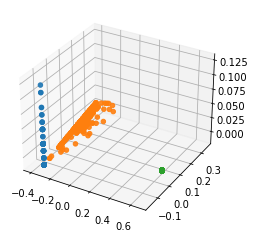

In [6]:
# 无p矩阵，region B
# "--gpu", "0", "--lr", "0.01", "--approach", "edfsnn", "--nhid", "100", "--nepochs", "50", "--experiment", "mnist_classIL", "--nlayers", "1", "--sbatch", "256", "--lr_factor", "1", "--output", "xxxx", "--seed", "0", "--B_type", "Regions_Standard", "--trace_name", "trace_test_B_region_withoutP", "--phase", "test", "--without_P"

# 正确率 8.3, 86.5, 100
# https://is7lwmjos4.feishu.cn/sheets/shtcnGdyAwjEfOPKZbeZr7Iivsh?from=from_copylink

with open("E:/Study/Data/essaycode/EAST/output_data/test_output_trace_B_region_LB_woP.pkl", 'rb') as f:
    x = pickle.load(f)
print(len(x))
y = []
yy = []
for i in range(len(x)):
    yy = []
    yy.append(x[i][0].cpu().detach().numpy())
    yy.append(x[i][1].cpu().detach().numpy())
    y.append(yy)
task1 = []
task2 = []
task3 = []
for i in range(len(y)):
    if y[i][0] == 0:
        task1.append(y[i][1])
    if y[i][0] == 1:
        task2.append(y[i][1])
    if y[i][0] == 2:
        task3.append(y[i][1])
task1 = np.array(task1)
task2 = np.array(task2)
task3 = np.array(task3)
y = []
for i in range(0,task1.shape[0],20):
    y.append(task1[i:i+20,:,:].mean(0))
task1 = np.array(y)[0]
print(task1.shape)
y = []
for i in range(0,task2.shape[0],20):
    y.append(task2[i:i+20,:,:].mean(0))
task2 = np.array(y)[0]
print(task2.shape)
y = []
for i in range(0,task3.shape[0],20):
    y.append(task3[i:i+20,:,:].mean(0))
task3 = np.array(y)[0]
print(task3.shape)

x = np.r_[task1,task2,task3]
print(x.shape)
x_ = PCA(n_components=3).fit_transform(x)
# np.random.seed(0)
# x_ = TSNE(n_components=3).fit_transform(x)
x2 = x_[0:task1.shape[0]]
x3 = x_[task1.shape[0]:task1.shape[0]+task2.shape[0]]
x4 = x_[task1.shape[0]+task2.shape[0]:task1.shape[0]+task2.shape[0]+task3.shape[0]]

colors=['C{}'.format(x) for x in range(10)]

j=0
ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x2[:,0]
Y1 = x2[:,1]
Z1 = x2[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
# for i in range(0,X1.shape[0]-1):
#     a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
#     ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()

j=1
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x3[:,0]
Y1 = x3[:,1]
Z1 = x3[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
# for i in range(0,X1.shape[0]-1):
#     a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
#     ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
j=2
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x4[:,0]
Y1 = x4[:,1] 
Z1 = x4[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
# for i in range(0,X1.shape[0]-1):
#     a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
#     ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
# ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.savefig('C:\code\EDF图\incremental/iso123_20220507.svg')
plt.savefig('E:\WPS同步文件夹\EAST\最新整理版本-20220507\Fig/woP_regionB_output_test.svg')
plt.show()

In [ ]:
# train

(23, 100)
(22, 100)
(22, 100)
(67, 100)


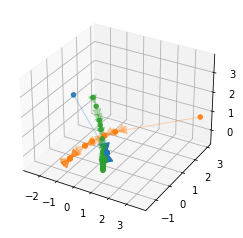

In [18]:
# 无p矩阵，uniform B
# "--gpu", "0", "--lr", "0.01", "--approach", "edfsnn", "--nhid", "100", "--nepochs", "50", "--experiment", "mnist_classIL", "--nlayers", "1", "--sbatch", "256", "--lr_factor", "1", "--output", "xxxx", "--seed", "0", "--B_type", "Uniform", "--trace_name", "trace_train_B_Uniform", "--phase", "train"

# 正确率 95.3, 100, 100
# https://is7lwmjos4.feishu.cn/sheets/shtcnGdyAwjEfOPKZbeZr7Iivsh?from=from_copylink

with open("E:/Study/Data/essaycode/EAST/output_data/trace_train_B_uniform_withoutP.pkl", 'rb') as f:
    x = pickle.load(f)
y = []
yy = []
for i in range(len(x)):
    yy = []
    yy.append(x[i][0].cpu().detach().numpy())
    yy.append(x[i][1].cpu().detach().numpy())
    y.append(yy)
task1 = []
task2 = []
task3 = []
for i in range(len(y)):
    if y[i][0] == 0:
        task1.append(y[i][1])
    if y[i][0] == 1:
        task2.append(y[i][1])
    if y[i][0] == 2:
        task3.append(y[i][1])
task1 = np.array(task1)
task2 = np.array(task2)
task3 = np.array(task3)
y = []
for i in range(0,task1.shape[0],20):
    y.append(task1[i:i+20,:,:].mean(0))
task1 = np.array(y)[:len(y)//2]
task1 = task1.mean(1)
print(task1.shape)
y = []
for i in range(0,task2.shape[0],20):
    y.append(task2[i:i+20,:,:].mean(0))
task2 = np.array(y)[:len(y)//2]
task2 = task2.mean(1)
print(task2.shape)
y = []
for i in range(0,task3.shape[0],20):
    y.append(task3[i:i+20,:,:].mean(0))
task3 = np.array(y)[:len(y)//2]
task3 = task3.mean(1)
print(task3.shape)

x = np.r_[task1,task2,task3]
print(x.shape)
x_ = manifold.Isomap(n_components=3).fit_transform(x)
x2 = x_[0:task1.shape[0]]
x3 = x_[task1.shape[0]:task1.shape[0]+task2.shape[0]]
x4 = x_[task1.shape[0]+task2.shape[0]:task1.shape[0]+task2.shape[0]+task3.shape[0]]

colors=['C{}'.format(x) for x in range(10)]

j=0
ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x2[:,0]
Y1 = x2[:,1]
Z1 = x2[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()

j=1
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x3[:,0]
Y1 = x3[:,1]
Z1 = x3[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
j=2
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x4[:,0]
Y1 = x4[:,1] 
Z1 = x4[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
# ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.savefig('C:\code\EDF图\incremental/iso123_20220507.svg')
plt.show()

In [9]:
# test

200
(256, 100)
(256, 100)
(256, 100)
(768, 100)


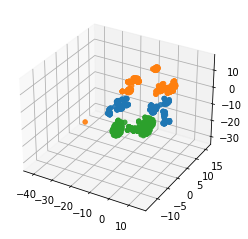

In [11]:
# 无p矩阵，uniform B
# "--gpu", "0", "--lr", "0.01", "--approach", "edfsnn", "--nhid", "100", "--nepochs", "50", "--experiment", "mnist_classIL", "--nlayers", "1", "--sbatch", "256", "--lr_factor", "1", "--output", "xxxx", "--seed", "0", "--B_type", "Uniform", "--trace_name", "trace_test_B_uniform_withoutP", "--phase", "test", "--without_P"

# 正确率 95.3, 100, 100
# https://is7lwmjos4.feishu.cn/sheets/shtcnGdyAwjEfOPKZbeZr7Iivsh?from=from_copylink

with open("E:/Study/Data/essaycode/EAST/output_data/trace_test_B_uniform_withoutP.pkl", 'rb') as f:
    x = pickle.load(f)
print(len(x))
y = []
yy = []
for i in range(len(x)):
    yy = []
    yy.append(x[i][0].cpu().detach().numpy())
    yy.append(x[i][1].cpu().detach().numpy())
    y.append(yy)
task1 = []
task2 = []
task3 = []
for i in range(len(y)):
    if y[i][0] == 0:
        task1.append(y[i][1])
    if y[i][0] == 1:
        task2.append(y[i][1])
    if y[i][0] == 2:
        task3.append(y[i][1])
task1 = np.array(task1)
task2 = np.array(task2)
task3 = np.array(task3)
y = []
for i in range(0,task1.shape[0],20):
    y.append(task1[i:i+20,:,:].mean(0))
task1 = np.array(y)[0]
print(task1.shape)
y = []
for i in range(0,task2.shape[0],20):
    y.append(task2[i:i+20,:,:].mean(0))
task2 = np.array(y)[0]
print(task2.shape)
y = []
for i in range(0,task3.shape[0],20):
    y.append(task3[i:i+20,:,:].mean(0))
task3 = np.array(y)[0]
print(task3.shape)

x = np.r_[task1,task2,task3]
print(x.shape)
x_ = PCA(n_components=3).fit_transform(x)
# np.random.seed(1)
# x_ = TSNE(n_components=3).fit_transform(x)
x2 = x_[0:task1.shape[0]]
x3 = x_[task1.shape[0]:task1.shape[0]+task2.shape[0]]
x4 = x_[task1.shape[0]+task2.shape[0]:task1.shape[0]+task2.shape[0]+task3.shape[0]]

colors=['C{}'.format(x) for x in range(10)]

j=0
ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x2[:,0]
Y1 = x2[:,1]
Z1 = x2[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
# for i in range(0,X1.shape[0]-1):
#     a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
#     ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()

j=1
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x3[:,0]
Y1 = x3[:,1]
Z1 = x3[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
# for i in range(0,X1.shape[0]-1):
#     a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
#     ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
j=2
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x4[:,0]
Y1 = x4[:,1] 
Z1 = x4[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
# for i in range(0,X1.shape[0]-1):
#     a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
#     ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
# ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.savefig('C:\code\EDF图\incremental/iso123_20220507.svg')
plt.show()

In [ ]:
# train

tensor(0.4785, device='cuda:0', grad_fn=<MeanBackward0>)
(23, 100)
(22, 100)
(22, 100)
(67, 100)


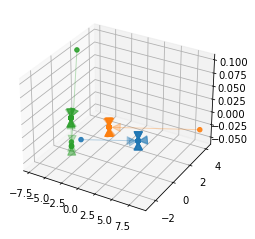

In [32]:
#  p矩阵，regin B Err
# "--gpu", "0", "--lr", "0.01", "--approach", "edfsnn", "--nhid", "100", "--nepochs", "50", "--experiment", "mnist_classIL", "--nlayers", "1", "--sbatch", "256", "--lr_factor", "1", "--output", "xxxx", "--seed", "0", "--B_type", "Uniform", "--trace_name", "trace_train_B_Uniform", "--phase", "train"

# 正确率 95.3, 100, 100
# https://is7lwmjos4.feishu.cn/sheets/shtcnGdyAwjEfOPKZbeZr7Iivsh?from=from_copylink

with open("E:/Study/Data/essaycode/EAST/output_data/train_trace_B_region_err.pkl", 'rb') as f:
    x = pickle.load(f)
    
print(x[1][1].mean())
y = []
yy = []
for i in range(len(x)):
    yy = []
    yy.append(x[i][0].cpu().detach().numpy())
    yy.append(x[i][1].cpu().detach().numpy())
    y.append(yy)
task1 = []
task2 = []
task3 = []
for i in range(len(y)):
    if y[i][0] == 0:
        task1.append(y[i][1])
    if y[i][0] == 1:
        task2.append(y[i][1])
    if y[i][0] == 2:
        task3.append(y[i][1])
task1 = np.array(task1)
task2 = np.array(task2)
task3 = np.array(task3)
y = []
for i in range(0,task1.shape[0],20):
    y.append(task1[i:i+20,:,:].mean(0))
task1 = np.array(y)[:len(y)//2]
task1 = task1.mean(1)
print(task1.shape)
y = []
for i in range(0,task2.shape[0],20):
    y.append(task2[i:i+20,:,:].mean(0))
task2 = np.array(y)[:len(y)//2]
task2 = task2.mean(1)
print(task2.shape)
y = []
for i in range(0,task3.shape[0],20):
    y.append(task3[i:i+20,:,:].mean(0))
task3 = np.array(y)[:len(y)//2]
task3 = task3.mean(1)
print(task3.shape)

x = np.r_[task1,task2,task3]
print(x.shape)
x_ = manifold.Isomap(n_components=3).fit_transform(x)
x2 = x_[0:task1.shape[0]]
x3 = x_[task1.shape[0]:task1.shape[0]+task2.shape[0]]
x4 = x_[task1.shape[0]+task2.shape[0]:task1.shape[0]+task2.shape[0]+task3.shape[0]]

colors=['C{}'.format(x) for x in range(10)]

j=0
ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x2[:,0]
Y1 = x2[:,1]
Z1 = x2[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()

j=1
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x3[:,0]
Y1 = x3[:,1]
Z1 = x3[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
j=2
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x4[:,0]
Y1 = x4[:,1] 
Z1 = x4[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
# ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.savefig('C:\code\EDF图\incremental/iso123_20220507.svg')
plt.show()

200
(256, 100)
(256, 100)
(256, 100)
(768, 100)


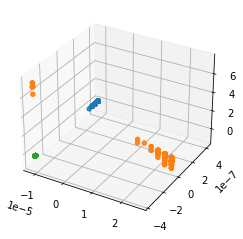

In [25]:
with open("E:/Study/Data/essaycode/EAST/output_data/test_trace_B_region_err.pkl", 'rb') as f:
    x = pickle.load(f)
print(len(x))
y = []
yy = []
for i in range(len(x)):
    yy = []
    yy.append(x[i][0].cpu().detach().numpy())
    yy.append(x[i][1].cpu().detach().numpy())
    y.append(yy)
task1 = []
task2 = []
task3 = []
for i in range(len(y)):
    if y[i][0] == 0:
        task1.append(y[i][1])
    if y[i][0] == 1:
        task2.append(y[i][1])
    if y[i][0] == 2:
        task3.append(y[i][1])
task1 = np.array(task1)
task2 = np.array(task2)
task3 = np.array(task3)
y = []
for i in range(0,task1.shape[0],20):
    y.append(task1[i:i+20,:,:].mean(0))
task1 = np.array(y)[0]
print(task1.shape)
y = []
for i in range(0,task2.shape[0],20):
    y.append(task2[i:i+20,:,:].mean(0))
task2 = np.array(y)[0]
print(task2.shape)
y = []
for i in range(0,task3.shape[0],20):
    y.append(task3[i:i+20,:,:].mean(0))
task3 = np.array(y)[0]
print(task3.shape)

x = np.r_[task1,task2,task3]
print(x.shape)
x_ = PCA(n_components=3).fit_transform(x)
# np.random.seed(1)
# x_ = TSNE(n_components=3).fit_transform(x)
x2 = x_[0:task1.shape[0]]
x3 = x_[task1.shape[0]:task1.shape[0]+task2.shape[0]]
x4 = x_[task1.shape[0]+task2.shape[0]:task1.shape[0]+task2.shape[0]+task3.shape[0]]

colors=['C{}'.format(x) for x in range(10)]

j=0
ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x2[:,0]
Y1 = x2[:,1]
Z1 = x2[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
# for i in range(0,X1.shape[0]-1):
#     a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
#     ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()

j=1
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x3[:,0]
Y1 = x3[:,1]
Z1 = x3[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
# for i in range(0,X1.shape[0]-1):
#     a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
#     ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
j=2
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x4[:,0]
Y1 = x4[:,1] 
Z1 = x4[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
# for i in range(0,X1.shape[0]-1):
#     a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
#     ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
# ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.savefig('C:\code\EDF图\incremental/iso123_20220507.svg')
plt.show()

In [ ]:
# train

tensor(0.4785, device='cuda:0', grad_fn=<MeanBackward0>)
(23, 100)
(22, 100)
(22, 100)
(67, 100)


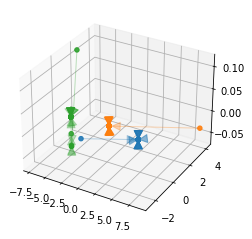

In [33]:
#  without p矩阵，regin B Err
# "--gpu", "0", "--lr", "0.01", "--approach", "edfsnn", "--nhid", "100", "--nepochs", "50", "--experiment", "mnist_classIL", "--nlayers", "1", "--sbatch", "256", "--lr_factor", "1", "--output", "xxxx", "--seed", "0", "--B_type", "Uniform", "--trace_name", "trace_train_B_Uniform", "--phase", "train"

# 正确率 95.3, 100, 100
# https://is7lwmjos4.feishu.cn/sheets/shtcnGdyAwjEfOPKZbeZr7Iivsh?from=from_copylink

with open("E:/Study/Data/essaycode/EAST/output_data/train_trace_B_region_err_woP.pkl", 'rb') as f:
    x = pickle.load(f)
print(x[1][1].mean())
y = []
yy = []
for i in range(len(x)):
    yy = []
    yy.append(x[i][0].cpu().detach().numpy())
    yy.append(x[i][1].cpu().detach().numpy())
    y.append(yy)
task1 = []
task2 = []
task3 = []
for i in range(len(y)):
    if y[i][0] == 0:
        task1.append(y[i][1])
    if y[i][0] == 1:
        task2.append(y[i][1])
    if y[i][0] == 2:
        task3.append(y[i][1])
task1 = np.array(task1)
task2 = np.array(task2)
task3 = np.array(task3)
y = []
for i in range(0,task1.shape[0],20):
    y.append(task1[i:i+20,:,:].mean(0))
task1 = np.array(y)[:len(y)//2]
task1 = task1.mean(1)
print(task1.shape)
y = []
for i in range(0,task2.shape[0],20):
    y.append(task2[i:i+20,:,:].mean(0))
task2 = np.array(y)[:len(y)//2]
task2 = task2.mean(1)
print(task2.shape)
y = []
for i in range(0,task3.shape[0],20):
    y.append(task3[i:i+20,:,:].mean(0))
task3 = np.array(y)[:len(y)//2]
task3 = task3.mean(1)
print(task3.shape)

x = np.r_[task1,task2,task3]
print(x.shape)
x_ = manifold.Isomap(n_components=3).fit_transform(x)
x2 = x_[0:task1.shape[0]]
x3 = x_[task1.shape[0]:task1.shape[0]+task2.shape[0]]
x4 = x_[task1.shape[0]+task2.shape[0]:task1.shape[0]+task2.shape[0]+task3.shape[0]]

colors=['C{}'.format(x) for x in range(10)]

j=0
ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x2[:,0]
Y1 = x2[:,1]
Z1 = x2[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()

j=1
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x3[:,0]
Y1 = x3[:,1]
Z1 = x3[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
j=2
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x4[:,0]
Y1 = x4[:,1] 
Z1 = x4[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
# ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.savefig('C:\code\EDF图\incremental/iso123_20220507.svg')
plt.show()

In [ ]:
# test

200
tensor(7.2942e-09, device='cuda:0', grad_fn=<MeanBackward0>)
(256, 100)
(256, 100)
(256, 100)
(768, 100)


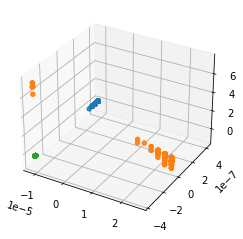

In [31]:
with open("E:/Study/Data/essaycode/EAST/output_data/test_trace_B_region_err_woP.pkl", 'rb') as f:
    x = pickle.load(f)
print(len(x))
print(x[1][1].mean())
y = []
yy = []
for i in range(len(x)):
    yy = []
    yy.append(x[i][0].cpu().detach().numpy())
    yy.append(x[i][1].cpu().detach().numpy())
    y.append(yy)
task1 = []
task2 = []
task3 = []
for i in range(len(y)):
    if y[i][0] == 0:
        task1.append(y[i][1])
    if y[i][0] == 1:
        task2.append(y[i][1])
    if y[i][0] == 2:
        task3.append(y[i][1])
task1 = np.array(task1)
task2 = np.array(task2)
task3 = np.array(task3)
y = []
for i in range(0,task1.shape[0],20):
    y.append(task1[i:i+20,:,:].mean(0))
task1 = np.array(y)[0]
print(task1.shape)
y = []
for i in range(0,task2.shape[0],20):
    y.append(task2[i:i+20,:,:].mean(0))
task2 = np.array(y)[0]
print(task2.shape)
y = []
for i in range(0,task3.shape[0],20):
    y.append(task3[i:i+20,:,:].mean(0))
task3 = np.array(y)[0]
print(task3.shape)

x = np.r_[task1,task2,task3]
print(x.shape)
x_ = PCA(n_components=3).fit_transform(x)
# np.random.seed(1)
# x_ = TSNE(n_components=3).fit_transform(x)
x2 = x_[0:task1.shape[0]]
x3 = x_[task1.shape[0]:task1.shape[0]+task2.shape[0]]
x4 = x_[task1.shape[0]+task2.shape[0]:task1.shape[0]+task2.shape[0]+task3.shape[0]]

colors=['C{}'.format(x) for x in range(10)]

j=0
ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x2[:,0]
Y1 = x2[:,1]
Z1 = x2[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
# for i in range(0,X1.shape[0]-1):
#     a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
#     ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()

j=1
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x3[:,0]
Y1 = x3[:,1]
Z1 = x3[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
# for i in range(0,X1.shape[0]-1):
#     a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
#     ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
j=2
# ax = plt.axes(projection='3d')  # 设置三维轴
X1 = x4[:,0]
Y1 = x4[:,1] 
Z1 = x4[:,2]
ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
for i in range(0,X1.shape[0]-1):
    a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
    ax.add_artist(a1)
# for i in range(0,X1.shape[0]-1):
#     a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
#     ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.show()
    
# ax.add_artist(a1)
# ax.view_init(elev=30, azim=-50)
# plt.savefig('C:\code\EDF图\incremental/iso123_20220507.svg')
plt.show()

In [13]:
a = '"--gpu", "0", "--lr", "0.005", "--approach", "edfsnn", "--nhid", "2000", "--nepochs", "1000", "--experiment", "hwdb_classIL", "--nlayers", "1", "--sbatch", "16", "--lr_factor", "2", "--output", "xxxx", "--seed", "0", "--B_plasticity", "LB", "--LBP_mode", "Adaptive_norm_N", "--mini"'
a.replace('", "', ' ')

'"--gpu 0 --lr 0.005 --approach edfsnn --nhid 2000 --nepochs 1000 --experiment hwdb_classIL --nlayers 1 --sbatch 16 --lr_factor 2 --output xxxx --seed 0 --B_plasticity LB --LBP_mode Adaptive_norm_N --mini"'

In [9]:
nohup python -u run.py --gpu 0 --lr 0.005 --approach edfsnn --nhid 100 --nepochs 50 --experiment mnist_classIL --nlayers 1 --sbatch 256 --lr_factor 1 --output xxxx --seed 0 --B_plasticity LB --LBP_mode Static_N > log_1 2>&1 & 

'"--gpu", "0", "--lr", "0.005", "--approach", "edfsnn", "--nhid", "100", "--nepochs", "50", "--experiment", "mnist_classIL", "--nlayers", "1", "--sbatch", "256", "--lr_factor", "1", "--output", "xxxx", "--seed", "0", "--B_plasticity", "LB", "--LBP_mode", "Static_N"'

In [14]:
import platform
print(platform.system())

import getpass
genUserName = getpass.getuser()
print(genUserName)

Windows
m1584


tensor(0.3190, device='cuda:0', grad_fn=<MeanBackward0>)
(100, 100)
10
10
10
10
10
10
10
10
10
10


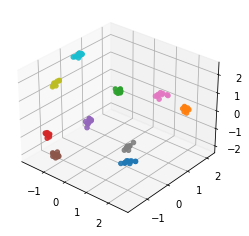

In [56]:
# with open("E:/Study/Data/essaycode/EAST/output_data/trace_hidden_train.pkl", 'rb') as f:
with open("E:/Study/Data/essaycode/EAST/output_data/test_hidden_trace_adaptive_N_10.pkl", 'rb') as f:
    x = pickle.load(f)
# print(x)
print(x[1][1].mean())
y = []
yy = []
for i in range(len(x)):
    yy = []
    yy.append(x[i][0].cpu().detach().numpy())
    yy.append(x[i][1].cpu().detach().numpy())
    y.append(yy)
task0 = []
task1 = []
task2 = []
task3 = []
task4 = []
task5 = []
task6 = []
task7 = []
task8 = []
task9 = []

for i in range(len(y)):
    if y[i][0] == 0:
        task0.append(y[i][1])
    if y[i][0] == 1:
        task1.append(y[i][1])
    if y[i][0] == 2:
        task2.append(y[i][1])
    if y[i][0] == 3:
        task3.append(y[i][1])
    if y[i][0] == 4:
        task4.append(y[i][1])
    if y[i][0] == 5:
        task5.append(y[i][1])
    if y[i][0] == 6:
        task6.append(y[i][1])
    if y[i][0] == 7:
        task7.append(y[i][1])
    if y[i][0] == 8:
        task8.append(y[i][1])
    if y[i][0] == 9:
        task9.append(y[i][1])
        
def testdata(task1):
    task1 = np.array(task1)
    y = []
    for i in range(0,task1.shape[0],20):
        y.append(task1[i:i+20,:,:].mean(0))
    task1 = np.array(y)#[:len(y)//2]
    task1 = task1.reshape((-1, 100), order='F')[:10]
#     index = np.linspace(0,task1.shape[0]-1,10).astype(int)
#     task1 = task1[index]
    return task1

task0 = testdata(task0)
task1 = testdata(task1)
task2 = testdata(task2)
task3 = testdata(task3)
task4 = testdata(task4)
task5 = testdata(task5)
task6 = testdata(task6)
task7 = testdata(task7)
task8 = testdata(task8)
task9 = testdata(task9)

XX = [task0, task1, task2, task3, task4, task5, task6, task7, task8, task9]
x = np.r_[task0,task1,task2,task3, task4, task5, task6, task7, task8, task9]
print(x.shape)
x_ = PCA(n_components=3).fit_transform(x)
# x_ = manifold.Isomap(n_components=3).fit_transform(x)
YY = []
num = 0
YY.append(x_[0:task0.shape[0]])
for i in range(1, 10):
    num+=YY[i-1].shape[0]
    YY.append(x_[num:(num + XX[i].shape[0])])
    
# YY.append(x_[0:task0.shape[0]])
# YY.append(x_[task0.shape[0]:task0.shape[0]+task1.shape[0]])
# YY.append(x_[task0.shape[0]+task1.shape[0]:task0.shape[0]+task1.shape[0]+task2.shape[0]])
    
temp = 0
for i in range(10):
    temp+=YY[i].shape[0]
    print(YY[i].shape[0])

colors=['C{}'.format(x) for x in range(10)]

ax = plt.axes(projection='3d')  # 设置三维轴
for j in range(10):
    X1 = YY[j][:,0]
    Y1 = YY[j][:,1]
    Z1 = YY[j][:,2]
    ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
#     for i in range(0,X1.shape[0]-1):
#         a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
#         ax.add_artist(a1)

ax.view_init(elev=30, azim=-50)
plt.savefig('E:\WPS同步文件夹\EAST\最新整理版本-20220507\Fig/test_hidden_trace_adaptive_N_10.svg')
plt.show()

tensor(0.3680, device='cuda:0', grad_fn=<MeanBackward0>)
(100, 100)
10
10
10
10
10
10
10
10
10
10


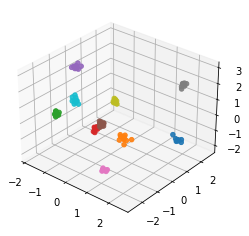

In [55]:
# with open("E:/Study/Data/essaycode/EAST/output_data/trace_hidden_train.pkl", 'rb') as f:
with open("E:/Study/Data/essaycode/EAST/output_data/test_hidden_trace_static_N_10.pkl", 'rb') as f:
    x = pickle.load(f)
# print(x)
print(x[1][1].mean())
y = []
yy = []
for i in range(len(x)):
    yy = []
    yy.append(x[i][0].cpu().detach().numpy())
    yy.append(x[i][1].cpu().detach().numpy())
    y.append(yy)
task0 = []
task1 = []
task2 = []
task3 = []
task4 = []
task5 = []
task6 = []
task7 = []
task8 = []
task9 = []

for i in range(len(y)):
    if y[i][0] == 0:
        task0.append(y[i][1])
    if y[i][0] == 1:
        task1.append(y[i][1])
    if y[i][0] == 2:
        task2.append(y[i][1])
    if y[i][0] == 3:
        task3.append(y[i][1])
    if y[i][0] == 4:
        task4.append(y[i][1])
    if y[i][0] == 5:
        task5.append(y[i][1])
    if y[i][0] == 6:
        task6.append(y[i][1])
    if y[i][0] == 7:
        task7.append(y[i][1])
    if y[i][0] == 8:
        task8.append(y[i][1])
    if y[i][0] == 9:
        task9.append(y[i][1])
        
def testdata(task1):
    task1 = np.array(task1)
    y = []
    for i in range(0,task1.shape[0],20):
        y.append(task1[i:i+20,:,:].mean(0))
    task1 = np.array(y)#[:len(y)//2]
    task1 = task1.reshape((-1, 100), order='F')[:10]
#     index = np.linspace(0,task1.shape[0]-1,10).astype(int)
#     task1 = task1[index]
    return task1

task0 = testdata(task0)
task1 = testdata(task1)
task2 = testdata(task2)
task3 = testdata(task3)
task4 = testdata(task4)
task5 = testdata(task5)
task6 = testdata(task6)
task7 = testdata(task7)
task8 = testdata(task8)
task9 = testdata(task9)

XX = [task0, task1, task2, task3, task4, task5, task6, task7, task8, task9]
x = np.r_[task0,task1,task2,task3, task4, task5, task6, task7, task8, task9]
print(x.shape)
x_ = PCA(n_components=3).fit_transform(x)
# x_ = manifold.Isomap(n_components=3).fit_transform(x)
YY = []
num = 0
YY.append(x_[0:task0.shape[0]])
for i in range(1, 10):
    num+=YY[i-1].shape[0]
    YY.append(x_[num:(num + XX[i].shape[0])])
    
# YY.append(x_[0:task0.shape[0]])
# YY.append(x_[task0.shape[0]:task0.shape[0]+task1.shape[0]])
# YY.append(x_[task0.shape[0]+task1.shape[0]:task0.shape[0]+task1.shape[0]+task2.shape[0]])
    
temp = 0
for i in range(10):
    temp+=YY[i].shape[0]
    print(YY[i].shape[0])

colors=['C{}'.format(x) for x in range(10)]

ax = plt.axes(projection='3d')  # 设置三维轴
for j in range(10):
    X1 = YY[j][:,0]
    Y1 = YY[j][:,1]
    Z1 = YY[j][:,2]
    ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
#     for i in range(0,X1.shape[0]-1):
#         a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
#         ax.add_artist(a1)

ax.view_init(elev=30, azim=-50)
plt.savefig('E:\WPS同步文件夹\EAST\最新整理版本-20220507\Fig/test_hidden_trace_static_N_10.svg')
plt.show()

tensor(0.3128, device='cuda:0', grad_fn=<MeanBackward0>)
(100, 100)
10
10
10
10
10
10
10
10
10
10


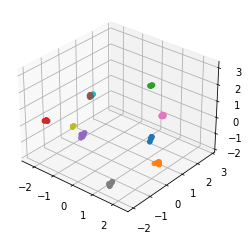

In [54]:
# with open("E:/Study/Data/essaycode/EAST/output_data/trace_hidden_train.pkl", 'rb') as f:
with open("E:/Study/Data/essaycode/EAST/output_data/test_hidden_trace_adaptive_N_10_TP.pkl", 'rb') as f:
    x = pickle.load(f)
# print(x)
print(x[1][1].mean())
y = []
yy = []
for i in range(len(x)):
    yy = []
    yy.append(x[i][0].cpu().detach().numpy())
    yy.append(x[i][1].cpu().detach().numpy())
    y.append(yy)
task0 = []
task1 = []
task2 = []
task3 = []
task4 = []
task5 = []
task6 = []
task7 = []
task8 = []
task9 = []

for i in range(len(y)):
    if y[i][0] == 0:
        task0.append(y[i][1])
    if y[i][0] == 1:
        task1.append(y[i][1])
    if y[i][0] == 2:
        task2.append(y[i][1])
    if y[i][0] == 3:
        task3.append(y[i][1])
    if y[i][0] == 4:
        task4.append(y[i][1])
    if y[i][0] == 5:
        task5.append(y[i][1])
    if y[i][0] == 6:
        task6.append(y[i][1])
    if y[i][0] == 7:
        task7.append(y[i][1])
    if y[i][0] == 8:
        task8.append(y[i][1])
    if y[i][0] == 9:
        task9.append(y[i][1])
        
def testdata(task1):
    task1 = np.array(task1)
    y = []
    for i in range(0,task1.shape[0],20):
        y.append(task1[i:i+20,:,:].mean(0))
    task1 = np.array(y)#[:len(y)//2]
    task1 = task1.reshape((-1, 100), order='F')[:10]
#     index = np.linspace(0,task1.shape[0]-1,10).astype(int)
#     task1 = task1[index]
    return task1

task0 = testdata(task0)
task1 = testdata(task1)
task2 = testdata(task2)
task3 = testdata(task3)
task4 = testdata(task4)
task5 = testdata(task5)
task6 = testdata(task6)
task7 = testdata(task7)
task8 = testdata(task8)
task9 = testdata(task9)

XX = [task0, task1, task2, task3, task4, task5, task6, task7, task8, task9]
x = np.r_[task0,task1,task2,task3, task4, task5, task6, task7, task8, task9]
print(x.shape)
x_ = PCA(n_components=3).fit_transform(x)
# x_ = manifold.Isomap(n_components=3).fit_transform(x)
YY = []
num = 0
YY.append(x_[0:task0.shape[0]])
for i in range(1, 10):
    num+=YY[i-1].shape[0]
    YY.append(x_[num:(num + XX[i].shape[0])])
    
# YY.append(x_[0:task0.shape[0]])
# YY.append(x_[task0.shape[0]:task0.shape[0]+task1.shape[0]])
# YY.append(x_[task0.shape[0]+task1.shape[0]:task0.shape[0]+task1.shape[0]+task2.shape[0]])
    
temp = 0
for i in range(10):
    temp+=YY[i].shape[0]
    print(YY[i].shape[0])

colors=['C{}'.format(x) for x in range(10)]

ax = plt.axes(projection='3d')  # 设置三维轴
for j in range(10):
    X1 = YY[j][:,0]
    Y1 = YY[j][:,1]
    Z1 = YY[j][:,2]
    ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
#     for i in range(0,X1.shape[0]-1):
#         a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
#         ax.add_artist(a1)

ax.view_init(elev=30, azim=-50)
plt.savefig('E:\WPS同步文件夹\EAST\最新整理版本-20220507\Fig/test_hidden_trace_adaptive_N_10_TP.svg')
plt.show()

(4, 256, 100)
(3, 256, 100)
(3, 256, 100)
(3, 256, 100)
(4, 256, 100)
(3, 256, 100)
(4, 256, 100)
(3, 256, 100)
(3, 256, 100)
(3, 256, 100)
(100, 100)
10
10
10
10
10
10
10
10
10
10


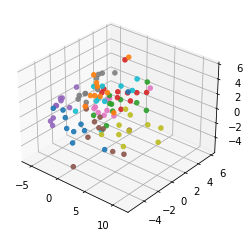

In [53]:
# with open("E:/Study/Data/essaycode/EAST/output_data/trace_hidden_train.pkl", 'rb') as f:
with open("E:/Study/Data/essaycode/EAST/output_data/test_hidden_trace_sgd_10.pkl", 'rb') as f:
    x = pickle.load(f)
# print(x)
# print(x)
y = []
yy = []
for i in range(len(x)):
    yy = []
    yy.append(x[i][0])
    yy.append(x[i][1].cpu().detach().numpy())
    y.append(yy)
task0 = []
task1 = []
task2 = []
task3 = []
task4 = []
task5 = []
task6 = []
task7 = []
task8 = []
task9 = []

for i in range(len(y)):
    if y[i][0] == 0:
        task0.append(y[i][1])
    if y[i][0] == 1:
        task1.append(y[i][1])
    if y[i][0] == 2:
        task2.append(y[i][1])
    if y[i][0] == 3:
        task3.append(y[i][1])
    if y[i][0] == 4:
        task4.append(y[i][1])
    if y[i][0] == 5:
        task5.append(y[i][1])
    if y[i][0] == 6:
        task6.append(y[i][1])
    if y[i][0] == 7:
        task7.append(y[i][1])
    if y[i][0] == 8:
        task8.append(y[i][1])
    if y[i][0] == 9:
        task9.append(y[i][1])
        
def testdata(task1):
    task1 = np.array(task1[:-1])
    print(task1.shape)
    task1 = task1.reshape((-1, 100), order='F')[:10]
#     index = np.linspace(0,task1.shape[0]-1,10).astype(int)
#     task1 = task1[index]
    return task1

task0 = testdata(task0)
task1 = testdata(task1)
task2 = testdata(task2)
task3 = testdata(task3)
task4 = testdata(task4)
task5 = testdata(task5)
task6 = testdata(task6)
task7 = testdata(task7)
task8 = testdata(task8)
task9 = testdata(task9)

XX = [task0, task1, task2, task3, task4, task5, task6, task7, task8, task9]
x = np.r_[task0,task1,task2,task3, task4, task5, task6, task7, task8, task9]
print(x.shape)
x_ = PCA(n_components=3).fit_transform(x)
# x_ = manifold.Isomap(n_components=3).fit_transform(x)
YY = []
num = 0
YY.append(x_[0:task0.shape[0]])
for i in range(1, 10):
    num+=YY[i-1].shape[0]
    YY.append(x_[num:(num + XX[i].shape[0])])
    
# YY.append(x_[0:task0.shape[0]])
# YY.append(x_[task0.shape[0]:task0.shape[0]+task1.shape[0]])
# YY.append(x_[task0.shape[0]+task1.shape[0]:task0.shape[0]+task1.shape[0]+task2.shape[0]])
    
temp = 0
for i in range(10):
    temp+=YY[i].shape[0]
    print(YY[i].shape[0])

colors=['C{}'.format(x) for x in range(10)]

ax = plt.axes(projection='3d')  # 设置三维轴
for j in range(10):
    X1 = YY[j][:,0]
    Y1 = YY[j][:,1]
    Z1 = YY[j][:,2]
    ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
#     for i in range(0,X1.shape[0]-1):
#         a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
#         ax.add_artist(a1)

ax.view_init(elev=30, azim=-50)
plt.savefig('E:\WPS同步文件夹\EAST\最新整理版本-20220507\Fig/sgd_hidden_10.svg')
plt.show()

(4, 256, 100)
(3, 256, 100)
(3, 256, 100)
(3, 256, 100)
(4, 256, 100)
(3, 256, 100)
(4, 256, 100)
(3, 256, 100)
(3, 256, 100)
(3, 256, 100)
(100, 100)
10
10
10
10
10
10
10
10
10
10


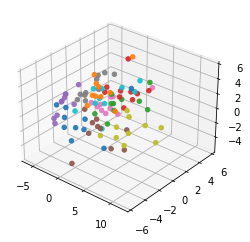

In [57]:
# with open("E:/Study/Data/essaycode/EAST/output_data/trace_hidden_train.pkl", 'rb') as f:
with open("E:/Study/Data/essaycode/EAST/output_data/test_hidden_trace_ewc_10.pkl", 'rb') as f:
    x = pickle.load(f)
# print(x)
# print(x)
y = []
yy = []
for i in range(len(x)):
    yy = []
    yy.append(x[i][0])
    yy.append(x[i][1].cpu().detach().numpy())
    y.append(yy)
task0 = []
task1 = []
task2 = []
task3 = []
task4 = []
task5 = []
task6 = []
task7 = []
task8 = []
task9 = []

for i in range(len(y)):
    if y[i][0] == 0:
        task0.append(y[i][1])
    if y[i][0] == 1:
        task1.append(y[i][1])
    if y[i][0] == 2:
        task2.append(y[i][1])
    if y[i][0] == 3:
        task3.append(y[i][1])
    if y[i][0] == 4:
        task4.append(y[i][1])
    if y[i][0] == 5:
        task5.append(y[i][1])
    if y[i][0] == 6:
        task6.append(y[i][1])
    if y[i][0] == 7:
        task7.append(y[i][1])
    if y[i][0] == 8:
        task8.append(y[i][1])
    if y[i][0] == 9:
        task9.append(y[i][1])
        
def testdata(task1):
    task1 = np.array(task1[:-1])
    print(task1.shape)
    task1 = task1.reshape((-1, 100), order='F')[:10]
#     index = np.linspace(0,task1.shape[0]-1,10).astype(int)
#     task1 = task1[index]
    return task1

task0 = testdata(task0)
task1 = testdata(task1)
task2 = testdata(task2)
task3 = testdata(task3)
task4 = testdata(task4)
task5 = testdata(task5)
task6 = testdata(task6)
task7 = testdata(task7)
task8 = testdata(task8)
task9 = testdata(task9)

XX = [task0, task1, task2, task3, task4, task5, task6, task7, task8, task9]
x = np.r_[task0,task1,task2,task3, task4, task5, task6, task7, task8, task9]
print(x.shape)
x_ = PCA(n_components=3).fit_transform(x)
# x_ = manifold.Isomap(n_components=3).fit_transform(x)
YY = []
num = 0
YY.append(x_[0:task0.shape[0]])
for i in range(1, 10):
    num+=YY[i-1].shape[0]
    YY.append(x_[num:(num + XX[i].shape[0])])
    
# YY.append(x_[0:task0.shape[0]])
# YY.append(x_[task0.shape[0]:task0.shape[0]+task1.shape[0]])
# YY.append(x_[task0.shape[0]+task1.shape[0]:task0.shape[0]+task1.shape[0]+task2.shape[0]])
    
temp = 0
for i in range(10):
    temp+=YY[i].shape[0]
    print(YY[i].shape[0])

colors=['C{}'.format(x) for x in range(10)]

ax = plt.axes(projection='3d')  # 设置三维轴
for j in range(10):
    X1 = YY[j][:,0]
    Y1 = YY[j][:,1]
    Z1 = YY[j][:,2]
    ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
#     for i in range(0,X1.shape[0]-1):
#         a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
#         ax.add_artist(a1)

ax.view_init(elev=30, azim=-50)
plt.savefig('E:\WPS同步文件夹\EAST\最新整理版本-20220507\Fig/ewc_hidden_10.svg')
plt.show()

(4, 256, 100)
(3, 256, 100)
(3, 256, 100)
(3, 256, 100)
(4, 256, 100)
(3, 256, 100)
(4, 256, 100)
(3, 256, 100)
(3, 256, 100)
(3, 256, 100)
(100, 10)
10
10
10
10
10
10
10
10
10
10


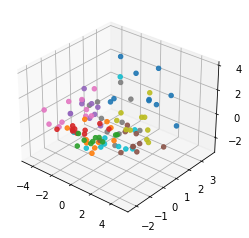

In [58]:
# with open("E:/Study/Data/essaycode/EAST/output_data/trace_hidden_train.pkl", 'rb') as f:
with open("E:/Study/Data/essaycode/EAST/output_data/test_hidden_trace_joint_10.pkl", 'rb') as f:
    x = pickle.load(f)
# print(x)
# print(x)
y = []
yy = []
for i in range(len(x)):
    yy = []
#     print(x[i][1])
    yy.append(x[i][0])
    yy.append(x[i][1].cpu().detach().numpy())
    y.append(yy)
task0 = []
task1 = []
task2 = []
task3 = []
task4 = []
task5 = []
task6 = []
task7 = []
task8 = []
task9 = []

for i in range(len(y)):
    if y[i][0] == 0:
        task0.append(y[i][1])
    if y[i][0] == 1:
        task1.append(y[i][1])
    if y[i][0] == 2:
        task2.append(y[i][1])
    if y[i][0] == 3:
        task3.append(y[i][1])
    if y[i][0] == 4:
        task4.append(y[i][1])
    if y[i][0] == 5:
        task5.append(y[i][1])
    if y[i][0] == 6:
        task6.append(y[i][1])
    if y[i][0] == 7:
        task7.append(y[i][1])
    if y[i][0] == 8:
        task8.append(y[i][1])
    if y[i][0] == 9:
        task9.append(y[i][1])
        
def testdata(task1):
#     print(task1[0])
    task1 = np.array(task1[:-1])
    print(task1.shape)
    task1 = task1.reshape((-1, 10), order='F')[:10]
#     index = np.linspace(0,task1.shape[0]-1,10).astype(int)
#     task1 = task1[index]
    return task1

task0 = testdata(task0)
task1 = testdata(task1)
task2 = testdata(task2)
task3 = testdata(task3)
task4 = testdata(task4)
task5 = testdata(task5)
task6 = testdata(task6)
task7 = testdata(task7)
task8 = testdata(task8)
task9 = testdata(task9)

XX = [task0, task1, task2, task3, task4, task5, task6, task7, task8, task9]
x = np.r_[task0,task1,task2,task3, task4, task5, task6, task7, task8, task9]
print(x.shape)
x_ = PCA(n_components=3).fit_transform(x)
# x_ = manifold.Isomap(n_components=3).fit_transform(x)
YY = []
num = 0
YY.append(x_[0:task0.shape[0]])
for i in range(1, 10):
    num+=YY[i-1].shape[0]
    YY.append(x_[num:(num + XX[i].shape[0])])
    
# YY.append(x_[0:task0.shape[0]])
# YY.append(x_[task0.shape[0]:task0.shape[0]+task1.shape[0]])
# YY.append(x_[task0.shape[0]+task1.shape[0]:task0.shape[0]+task1.shape[0]+task2.shape[0]])
    
temp = 0
for i in range(10):
    temp+=YY[i].shape[0]
    print(YY[i].shape[0])

colors=['C{}'.format(x) for x in range(10)]

ax = plt.axes(projection='3d')  # 设置三维轴
for j in range(10):
    X1 = YY[j][:,0]
    Y1 = YY[j][:,1]
    Z1 = YY[j][:,2]
    ax.scatter3D(X1, Y1, Z1,color=colors[j],alpha=.9)  # 三个数组对应三个维度（三个数组中的数一一对应）
#     for i in range(0,X1.shape[0]-1):
#         a1 = Arrow3D([X1[i],X1[i+1]],[Y1[i],Y1[i+1]],[Z1[i],Z1[i+1]], mutation_scale=20, lw=1, arrowstyle="-|>", color=colors[j], alpha=.3)#, linestyle="dashed")
#         ax.add_artist(a1)

ax.view_init(elev=30, azim=-50)
plt.savefig('E:\WPS同步文件夹\EAST\最新整理版本-20220507\Fig/joint_hidden_10.svg')
plt.show()